## Importer data

In [6]:
import matplotlib.pyplot as plt
import pandas
data = pandas.read_csv('data.txt', ',')
data

,SampleDate,Copenhagen,Aarhus
0,26-02-2020,0,0
1,27-02-2020,1,0
2,28-02-2020,0,1
3,01-03-2020,1,0
4,02-03-2020,1,0
...,...,...,...
400,02-04-2021,90,33
401,03-04-2021,90,41
402,04-04-2021,94,23
403,05-04-2021,22,0


## Let's see a bare graph of the numbers.
only for the last 3 weeks.

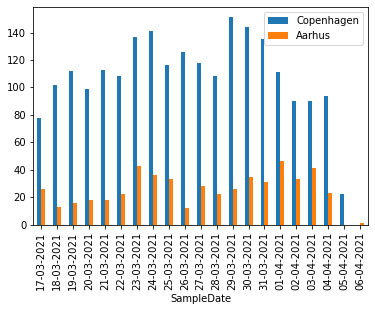

In [7]:
data.tail(21).plot(y=['Copenhagen', 'Aarhus'], x='SampleDate', kind='bar')
plt.show()

## Show a pie chart with numbers for the cities.
It requires a summation of each column. 

<AxesSubplot:ylabel='Counts'>

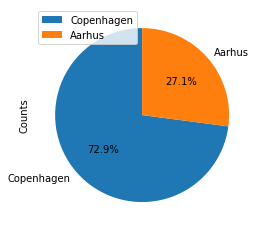

In [20]:
# Vi summerer kolonnerne (axis = 0)
sums = data.sum(axis=0)

# Opret ny dataframe med sum for hver by.
cityValue = pandas.DataFrame([sums.Copenhagen, sums.Aarhus], columns=['Counts'],index=['Copenhagen', 'Aarhus'] )

# Vis piechart med sum og procent.
cityValue.plot.pie(y='Counts', autopct='%.1f%%', startangle=90) # display the percentage value to 1 decimal place


## Show development over time in series graph.
All data is included. 

<AxesSubplot:xlabel='SampleDate'>

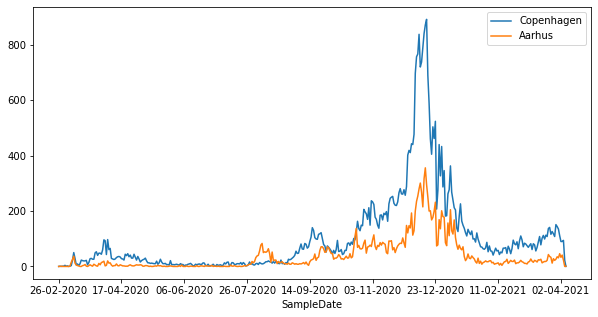

In [33]:
data.plot(x='SampleDate', y=['Copenhagen','Aarhus'], figsize=(10,5))

## Boxplot with data
This shows, among other things, that the upper 25% of data are spread over a large distance (many cases of infection). 

<AxesSubplot:>

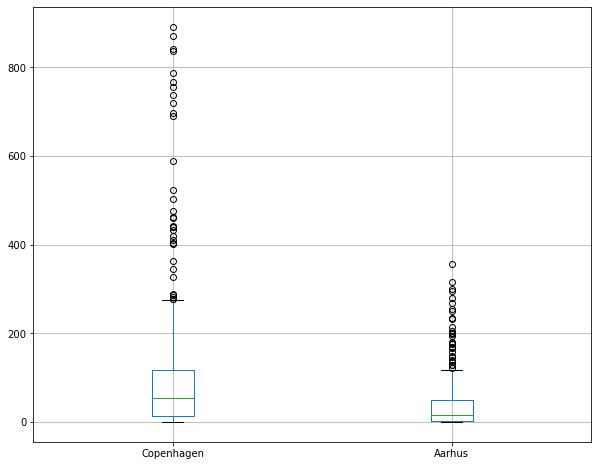

In [36]:
data.boxplot(figsize=(10,8))

<AxesSubplot:ylabel='Density'>

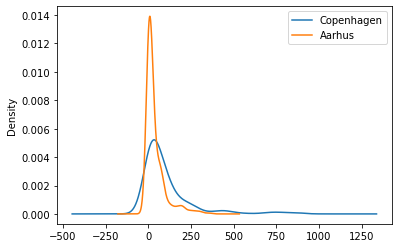

In [40]:
data.plot.kde()

## Calculate t-value population
Here, the entire population is used, which is probably not true due to outliers and a large difference in variances. 

In [52]:
# https://www.youtube.com/watch?v=pTmLQvMM-1M
# https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
import math
signal = data.Copenhagen.mean()-data.Aarhus.mean() # signal er forskellen mellem sample 1 mean og sample 2 mean

# variance measures how far a set of numbers is spread out from their average value
variance_copenhagen = data.Copenhagen.std()**2
variance_aarhus = data.Aarhus.std()**2

# are variances similar?
print("variance cph: " + str(variance_copenhagen) + "\nvariance aah: " + str(variance_aarhus))

noise = math.sqrt((variance_copenhagen/data.Copenhagen.count()) + (variance_aarhus / data.Aarhus.count())) # skal vi medregne varians faktor?

t_value = signal / noise
print("signal: " + str(signal) + "\nnoise: " +str(noise) + "\nt_value: " + str(t_value))

variance cph: 23322.989878987908
variance aah: 3409.478266715559
signal: 65.20987654320987
noise: 8.124413467255476
t_value: 8.026410374857319


In [53]:
# degree of freedom = n1 + n2 - 2
degree_of_freedom = data.Copenhagen.count() + data.Aarhus.count() - 2 #808

# http://www.ttable.org/student-t-value-calculator.html
# t-test
critical_value = 1.9629  # critical value er 1.9629 når n>100, probability=0.05 med two tails. 
                        # 5 af 100 gange accepteres null-hypotesen. www.ttable.org

## Calculate t-value sample
Here a sample with 20 elements is used. Here we will theoretically drop outliers in some passes which will give a more accurate t-value. There is still a big difference in variances, but Copenhagen's population is also significantly larger than Aarhus', which may be the reason for several daily tests. 

In [44]:
sample = data.sample(n=20)  # critical value er 2.086 når n=20, probability=0.05 med two tails. 
                            # 5 af 100 gange accepteres null-hypotesen. www.ttable.org
signal = sample.Copenhagen.mean()-sample.Aarhus.mean()
sample_variance_cph = sample.Copenhagen.std()**2
sample_variance_aah = sample.Aarhus.std()**2

# Are variances similar?
print("variance cph: " + str(sample_variance_cph) + "\nvariance aah: " + str(sample_variance_aah))

noise = math.sqrt((sample_variance_cph/sample.Copenhagen.count()) + (sample_variance_aah/sample.Aarhus.count()))

t_value = signal / noise
print("signal: " + str(signal) + "\nnoise: " +str(noise) + "\nt_value: " + str(t_value))

variance cph: 5352.62105263158
variance aah: 606.8315789473686
signal: 49.00000000000001
noise: 17.261883778398794
t_value: 2.8386241402759134


## Remove outliers
To normalize the data set a bit, we remove the extremes so that our t-value becomes more consistent. 

In [94]:
# https://stackoverflow.com/questions/46245035/pandas-dataframe-remove-outliers
def Remove_Outlier_Indices(df:pandas.DataFrame):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1 # inter_quantile_range    
    trueList = ~((df < Q1) | (df > Q3)) #trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

test = Remove_Outlier_Indices(data)
dataSubset = data[test]

<ipython-input-94-9f5c4ea91090>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  trueList = ~((df < Q1) | (df > Q3)) #trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
<ipython-input-94-9f5c4ea91090>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  trueList = ~((df < Q1) | (df > Q3)) #trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))


## t-value
Now without outliers because values outside the 1st and 3rd quantiles are sorted out.
Our t-value generally stays above the critical value of 2,086, however, there are occasional exceptions. 

In [97]:
sample = dataSubset.sample(n=20)  # critical value er 2.086 når n=20, probability=0.05 med two tails. 
                            # 5 af 100 gange accepteres null-hypotesen. www.ttable.org
signal = sample.Copenhagen.mean()-sample.Aarhus.mean()
sample_variance_cph = sample.Copenhagen.std()**2
sample_variance_aah = sample.Aarhus.std()**2

# Are variances similar?
print("variance cph: " + str(sample_variance_cph) + "\nvariance aah: " + str(sample_variance_aah))

noise = math.sqrt((sample_variance_cph/sample.Copenhagen.count()) + (sample_variance_aah/sample.Aarhus.count()))

t_value = signal / noise
print("signal: " + str(signal) + "\nnoise: " +str(noise) + "\nt_value: " + str(t_value))

variance cph: 905.8909090909091
variance aah: 235.99999999999997
signal: 32.40909090909091
noise: 10.576091858917662
t_value: 3.064373053999513
